In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [77]:
k = 201
tt = [-3 + 6 * (i - 1) / (k - 1) for i in range(1, k + 1)]
tt = np.array(tt)
yy = np.exp(tt)
tt[:10], yy[:10]

(array([-3.  , -2.97, -2.94, -2.91, -2.88, -2.85, -2.82, -2.79, -2.76,
        -2.73]),
 array([0.04978707, 0.05130331, 0.05286573, 0.05447573, 0.05613476,
        0.05784432, 0.05960594, 0.06142121, 0.06329177, 0.06521929]))

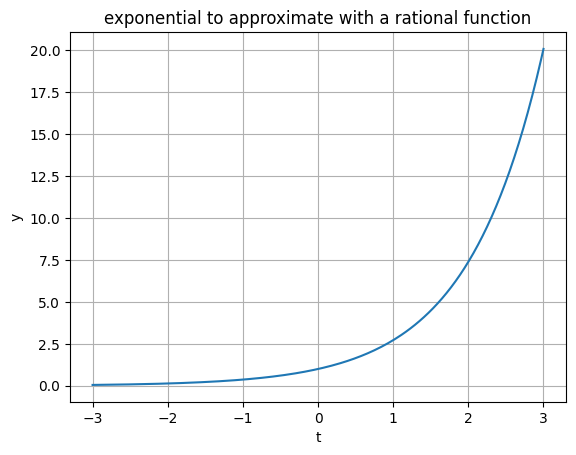

In [78]:
plt.plot(tt, yy)
plt.xlabel("t")
plt.ylabel("y")
plt.title("exponential to approximate with a rational function")
plt.grid(True)
plt.show()

In [85]:
a = cp.Variable(3)
b = cp.Variable(2)
m = cp.Parameter()


def p(t):
    return a[0] + a[1] * t + a[2] * t * t


def q(t):
    return 1 + b[0] * t + b[1] * t * t


pp = [p(tt[i]) for i in range(k)]
pp = cp.hstack(pp)
qq = [q(tt[i]) for i in range(k)]
qq = cp.hstack(qq)

domain_constraint = qq >= 0
r = pp - cp.multiply(yy, qq)


def is_feasible(m_value):
    m.value = m_value
    max_constraint = cp.maximum(r, -r) <= m * qq

    obj = cp.Minimize(0)
    prob = cp.Problem(obj, [domain_constraint, max_constraint])
    prob.solve()
    return prob.status == cp.OPTIMAL

In [86]:
# Bisection
lo = 0
hi = 1
# make sure hi is feasible and lo isn't
assert not is_feasible(lo)
assert is_feasible(hi)

tolerance = 1e-3
while hi - lo > tolerance:
    mid = (lo + hi) / 2
    if is_feasible(mid):
        hi = mid
    else:
        lo = mid

/home/axiom/school/ee364a/hw6/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:173: UserWarning: Constraint #1 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "
/home/axiom/school/ee364a/hw6/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [104]:
true_m = hi
is_feasible(true_m)
true_a = a.value
true_b = b.value
true_m, true_a, true_b

/home/axiom/school/ee364a/hw6/.venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:173: UserWarning: Constraint #1 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


(0.0234375,
 array([1.00975705, 0.61214317, 0.11363918]),
 array([-0.41441951,  0.04845389]))

In [105]:
def f(t):
    return (true_a[0] + true_a[1] * t + true_a[2] * t * t) / (
        1 + true_b[0] * t + true_b[1] * t * t
    )


y_approx = f(tt)

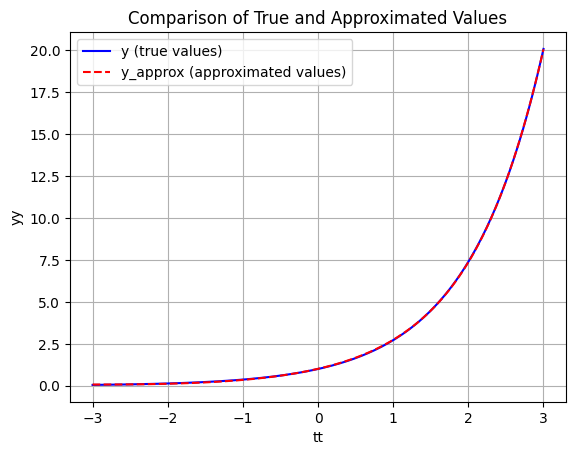

In [108]:
plt.plot(tt, yy, label="y (true values)", color="blue")
plt.plot(
    tt, y_approx, label="y_approx (approximated values)", color="red", linestyle="--"
)
plt.xlabel("tt")
plt.ylabel("yy")
plt.title("Comparison of True and Approximated Values")
plt.legend()
plt.grid(True)
plt.show()

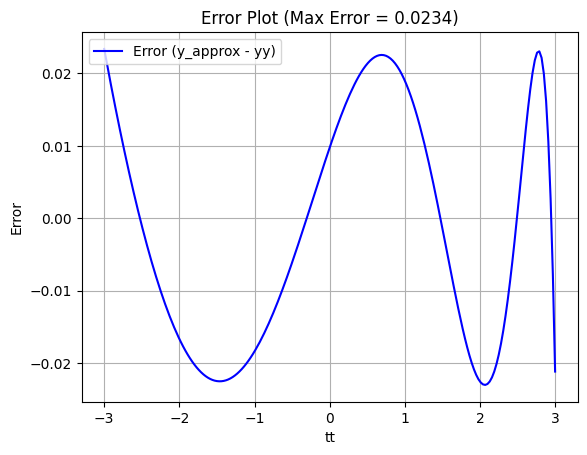

In [110]:
errs = y_approx - yy
max_err = np.max(np.abs(errs))
plt.plot(tt, errs, label="Error (y_approx - yy)", color="blue")
plt.xlabel("tt")
plt.ylabel("Error")
plt.title(f"Error Plot (Max Error = {max_err:.4f})")
plt.legend()
plt.grid(True)
plt.show()